<a href="https://colab.research.google.com/github/jskim16/MLproj/blob/main/%EC%95%8C%ED%8C%8C%EB%B2%B3%EC%9D%B8%EC%8B%9D_AI%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from google.colab import drive

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/A_Z Handwritten Data.csv').astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

x = dataset.drop('label', axis = 1)
y = dataset['label']

train_images, test_images, train_labels, test_labels = train_test_split(x, y)

In [5]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(train_images)

train_images = minMaxScaler.transform(train_images)
test_images = minMaxScaler.transform(test_images)

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

In [6]:
from keras import models
from keras import layers

In [7]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=256)

Epoch 1/5
1092/1092 [==============================] - 5s 5ms/step - loss: 0.2473 - accuracy: 0.9303
Epoch 2/5
1092/1092 [==============================] - 5s 5ms/step - loss: 0.0833 - accuracy: 0.9769
Epoch 3/5
1092/1092 [==============================] - 5s 5ms/step - loss: 0.0624 - accuracy: 0.9827
Epoch 4/5
1092/1092 [==============================] - 5s 5ms/step - loss: 0.0514 - accuracy: 0.9856
Epoch 5/5
1092/1092 [==============================] - 5s 5ms/step - loss: 0.0434 - accuracy: 0.9879


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

2910/2910 [==============================] - 7s 2ms/step - loss: 0.0535 - accuracy: 0.9857


In [11]:
train_images = train_images.reshape(train_images.shape[0], 28, 28).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28).astype('float32')

In [12]:
origin_my_image = test_images[0]

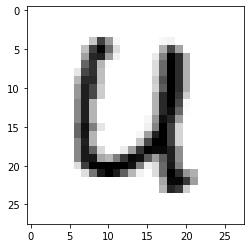

In [13]:
myDigit = origin_my_image
plt.imshow(myDigit, cmap=plt.cm.binary)

In [44]:
img = cv2.imread('M.jpg')
resize_img = cv2.resize(img,(28,28))
img2 = cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY)
img2.shape

(28, 28)

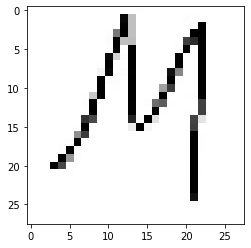

In [45]:
plt.imshow(resize_img)

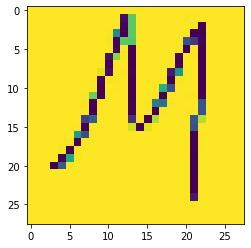

In [46]:
plt.imshow(img2)

In [47]:
minMaxScaler.fit(img2)
img2 = minMaxScaler.transform(img2)

In [48]:
img2 = img2.reshape(28, 28, 1).astype('float32')
img2.shape

(28, 28, 1)

In [49]:
print(img2)

[[[0.        ]
  [0.        ]
  [0.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [0.996063  ]
  [0.99607843]
  [0.996063  ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [0.02755906]
  [0.7490196 ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [0.99215686]
  [0.99607843]
  [0.99607843]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1. 

In [29]:
output = model.predict(img2)
print("결과는 : ", np.argmax(output))

ValueError: ignored

In [ ]:
output